In [2]:
import sqlite3

# Connect to SQLite database (it creates the file if not present)
conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()

# Create the sales table (if it doesn't exist already)
cur.execute("""
    CREATE TABLE IF NOT EXISTS sales (
        product TEXT,
        quantity INTEGER,
        price REAL
    )
""")

# Expanded sample sales data with more products and repeated entries
sales_data = [
    ('Apple', 10, 50.0),
    ('Banana', 5, 20.0),
    ('Apple', 7, 50.0),
    ('Orange', 8, 30.0),
    ('Banana', 12, 22.0),
    ('Grapes', 15, 40.0),
    ('Mango', 20, 60.0),
    ('Orange', 5, 30.0),
    ('Strawberry', 8, 70.0),
    ('Apple', 3, 50.0)
]

# Insert data into the sales table
cur.executemany("INSERT INTO sales VALUES (?, ?, ?)", sales_data)

# Commit changes and close connection
conn.commit()
conn.close()

print("Database created!")


Database created!


In [3]:
import pandas as pd

# Connect to the database again
conn = sqlite3.connect("sales_data.db")

# SQL query to get total quantity sold and total revenue per product
query = """
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""

# Run query and load into pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the results
print("Sales Summary:")
print(df)


Sales Summary:
      product  total_quantity  total_revenue
0       Apple              57         2850.0
1      Banana              39          828.0
2      Grapes              30         1200.0
3       Mango              40         2400.0
4      Orange              34         1020.0
5  Strawberry              16         1120.0


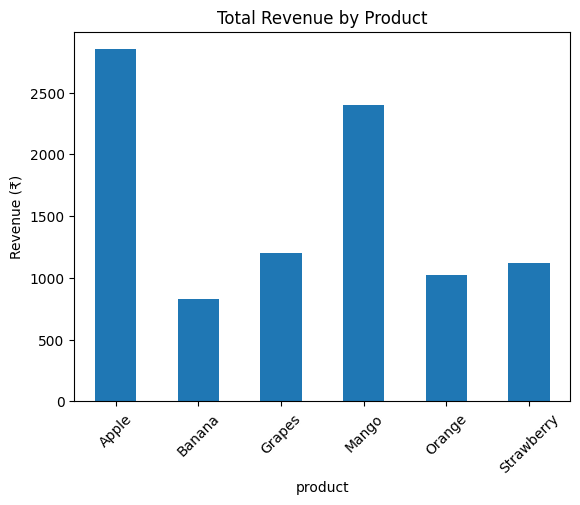

In [4]:
import matplotlib.pyplot as plt

# Plot the total revenue by product as a bar chart
df.plot(kind='bar', x='product', y='total_revenue', legend=False)

plt.ylabel("Revenue (₹)")
plt.title("Total Revenue by Product")
plt.xticks(rotation=45)  # Rotate product names for better readability

plt.show()
